# Housing Prices Competition

Credit: https://www.kaggle.com/competitions/home-data-for-ml-course

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [4]:
np.random.seed(66)

## Load Dataset

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

## Data walkthrough

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
cols_with_nulls = train_df.isnull().sum().sort_values(ascending=False)

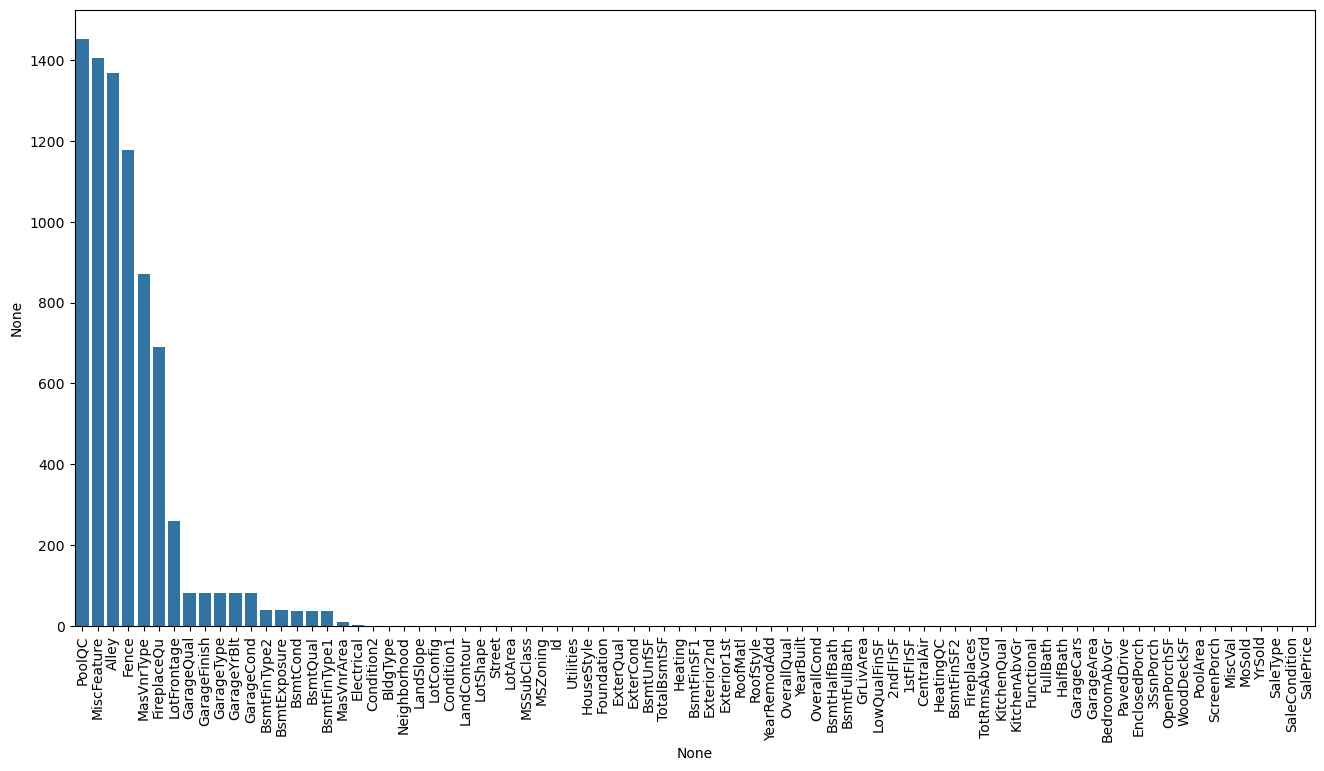

In [35]:
plt.figure(figsize=(16, 8))
sns.barplot(x=cols_with_nulls.index, y=cols_with_nulls)
plt.xticks(rotation=90)
plt.show()

### Important features

In [36]:
important_features = ['LotArea', 'Utilities', 'Street', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 
                      'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath','HalfBath', 'Fireplaces', 
                      'TotalBsmtSF', 'BsmtCond', 'GrLivArea', 'GarageArea',
                      'CentralAir', 'HeatingQC', 'Electrical', 'PoolArea', 'OpenPorchSF', 'EnclosedPorch']

In [37]:
filtered_train_df = train_df[important_features]

In [38]:
filtered_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1460 non-null   int64 
 1   Utilities      1460 non-null   object
 2   Street         1460 non-null   object
 3   OverallCond    1460 non-null   int64 
 4   YearBuilt      1460 non-null   int64 
 5   1stFlrSF       1460 non-null   int64 
 6   2ndFlrSF       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   BedroomAbvGr   1460 non-null   int64 
 9   KitchenAbvGr   1460 non-null   int64 
 10  FullBath       1460 non-null   int64 
 11  HalfBath       1460 non-null   int64 
 12  Fireplaces     1460 non-null   int64 
 13  TotalBsmtSF    1460 non-null   int64 
 14  BsmtCond       1423 non-null   object
 15  GrLivArea      1460 non-null   int64 
 16  GarageArea     1460 non-null   int64 
 17  CentralAir     1460 non-null   object
 18  HeatingQC      1460 non-null

### Categorial Features

In [49]:
filtered_train_df.select_dtypes(include='object').columns

Index(['Utilities', 'Street', 'BsmtCond', 'CentralAir', 'HeatingQC',
       'Electrical'],
      dtype='object')

## Outliers

## EDA

Corelation